In [1]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1.9000     ✔ purrr   0.3.3     
✔ tibble  2.1.3          ✔ dplyr   0.8.3     
✔ tidyr   1.0.0          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "telco-customer-churn"

In [2]:
library(ggplot2)
library(dbplyr)
library(dplyr)
library(gridExtra)
library(corrplot)
library(dummies)
library(party)
library(MASS)
library(pROC)
library(caret)
library(rpart)
library(randomForest)
library(rpart.plot)


Attaching package: ‘dbplyr’


The following objects are masked from ‘package:dplyr’:

    ident, sql



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.84 loaded

dummies-1.5.6 provided by Decision Patterns


Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Loading require

**Data**

In [3]:
#importing data
my_data <- read.csv("../input//telco-customer-churn//WA_Fn-UseC_-Telco-Customer-Churn.csv")
head(my_data)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


**Data Overview**

In [4]:
my_missing_NA_value_function <- function(dataset){
  
  Total_NA <- sum(is.na(dataset))
  Column_sums <- colSums(is.na(dataset))
  cat("Total NA in the dataset - \n\n",Total_NA)
    cat("\n--------------##-----------------")
  cat('\n\n Total NA by column in the dataset-\n\n',Column_sums)
        cat("\n--------------##-----------------")
  Column_names <- colnames(dataset)[apply(dataset,2,anyNA)]
  cat('\n\n Names of NA columns in the dataset-\n\n',Column_names)
}


my_data_overview <- function(dataset){
  data <- dim(dataset)
  cat("\nTotal Number of [rows vs columns] in the dataset- \n",data)
        cat("\n--------------##-----------------")
  Column_datatypes <- sapply(dataset,class)
  cat('\n\n Datatypes of all the columns in the dataset-\n',Column_datatypes)
        cat("\n--------------##-----------------")
  Column_Names <- colnames(dataset)
  cat('\n\n Names of all the columns in the dataset-\n',Column_Names)    
}

In [5]:
my_missing_NA_value_function(my_data)

Total NA in the dataset - 

 11
--------------##-----------------

 Total NA by column in the dataset-

 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 11 0
--------------##-----------------

 Names of NA columns in the dataset-

 TotalCharges

In [6]:
my_data_overview(my_data)


Total Number of [rows vs columns] in the dataset- 
 7043 21
--------------##-----------------

 Datatypes of all the columns in the dataset-
 factor factor integer factor factor integer factor factor factor factor factor factor factor factor factor factor factor factor numeric numeric factor
--------------##-----------------

 Names of all the columns in the dataset-
 customerID gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges Churn

In [7]:
#Unique data in each column
apply(my_data,2,function(x) length(unique(x)))

customerID           gender    SeniorCitizen          Partner 
            7043                2                2                2 
      Dependents           tenure     PhoneService    MultipleLines 
               2               73                2                3 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               3                3                3                3 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               3                3                3                3 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               2                4             1585             6531 
           Churn 
               2

**Data Manipulaton**

In [8]:
#count of missing values
sum(is.na(my_data$TotalCharges))

#missing value deletion
my_data <- na.omit(my_data)

[1] 11

In [9]:
#senior citizen is in integer form
my_data$SeniorCitizen <- as.factor(my_data$SeniorCitizen)

#creating new column tenure_bin and converting the tenure in years.
my_data <- mutate(my_data,tenure_bin=tenure)
my_data$tenure_bin[my_data$tenure_bin >= 0 & my_data$tenure_bin <= 12]   <- "0 - 1 years"
my_data$tenure_bin[my_data$tenure_bin >= 13 & my_data$tenure_bin <= 24]  <- "1 - 2 years"
my_data$tenure_bin[my_data$tenure_bin >= 25 & my_data$tenure_bin <= 36]  <- "2 - 3 years"
my_data$tenure_bin[my_data$tenure_bin >= 37 & my_data$tenure_bin <= 48]  <- "3 - 4 years"
my_data$tenure_bin[my_data$tenure_bin >= 49 & my_data$tenure_bin <= 60]  <- "4 - 5 years"
my_data$tenure_bin[my_data$tenure_bin >= 61 & my_data$tenure_bin <= 72]  <- "5 - 6 years"

#converting the newly created column into factor tenure_bin.
my_data$tenure_bin = as.factor(my_data$tenure_bin)

In [10]:
#In the column MultipleLines modifying the No phone service -> No
my_data$MultipleLines[which(my_data$MultipleLines=="No phone service")]<-"No"

***Exploratory Data Analysis***

Warning message:
“position_stack requires non-overlapping x intervals”


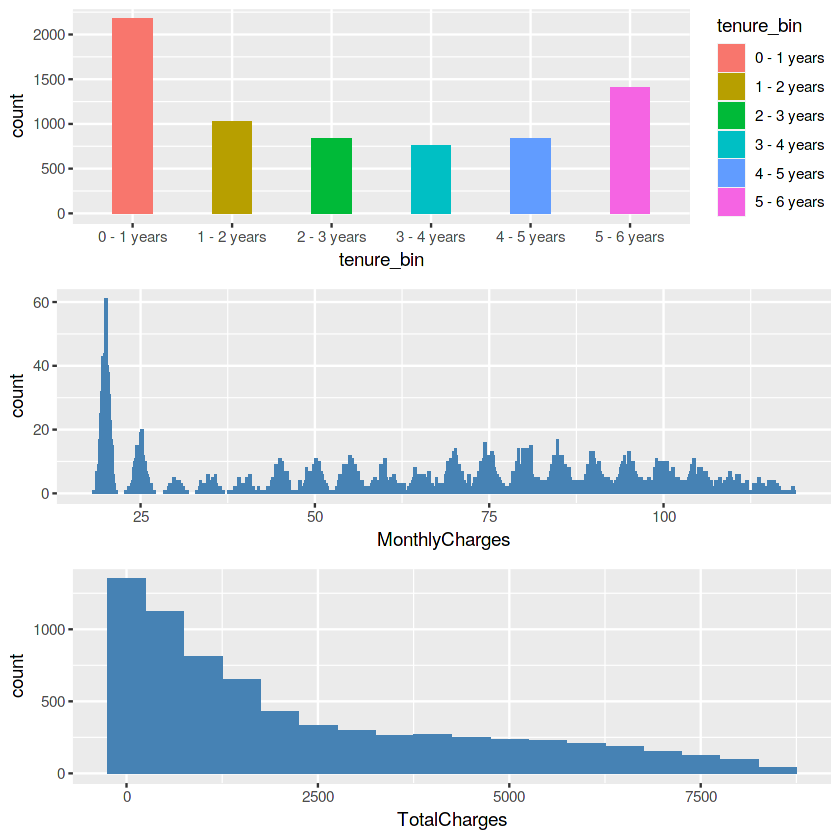

In [11]:
#Graphical Representation of the Numerical Variables histograms
plot_A <- ggplot(my_data,aes(x = tenure_bin,fill=tenure_bin))+ geom_bar(width=0.4)
plot_B <- ggplot(my_data,aes(x = MonthlyCharges))+ geom_bar(fill="Steelblue",width=0.4)
plot_C <- ggplot(my_data,aes(x = TotalCharges))+ geom_histogram(fill="steelblue",binwidth =500)

grid.arrange(plot_A,plot_B,plot_C)

In [12]:
plot4 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = PaymentMethod,y=..prop..,group=2),fill="Steelblue",stat='count',width=0.4)
plot5 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = gender,y=..prop..,group=2),fill="Steelblue",stat='count',width=0.4)
plot6 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = SeniorCitizen,y=..prop..,group=2),fill="Steelblue",stat='count',width=0.4)
plot7 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = Partner,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot8 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = Dependents,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot9 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = PhoneService,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot10 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = MultipleLines,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot11 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = InternetService,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot12 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = OnlineSecurity,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot13 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = OnlineBackup,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot14 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = DeviceProtection,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot15 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = TechSupport,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot16 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = StreamingTV,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot17 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = StreamingMovies,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot18 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = Contract,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot19 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = PaperlessBilling,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')
plot20 <- ggplot(data=my_data) + geom_bar(mapping = aes(x = Churn,y=..prop..,group=2),fill="Steelblue",width=0.4,stat='count')

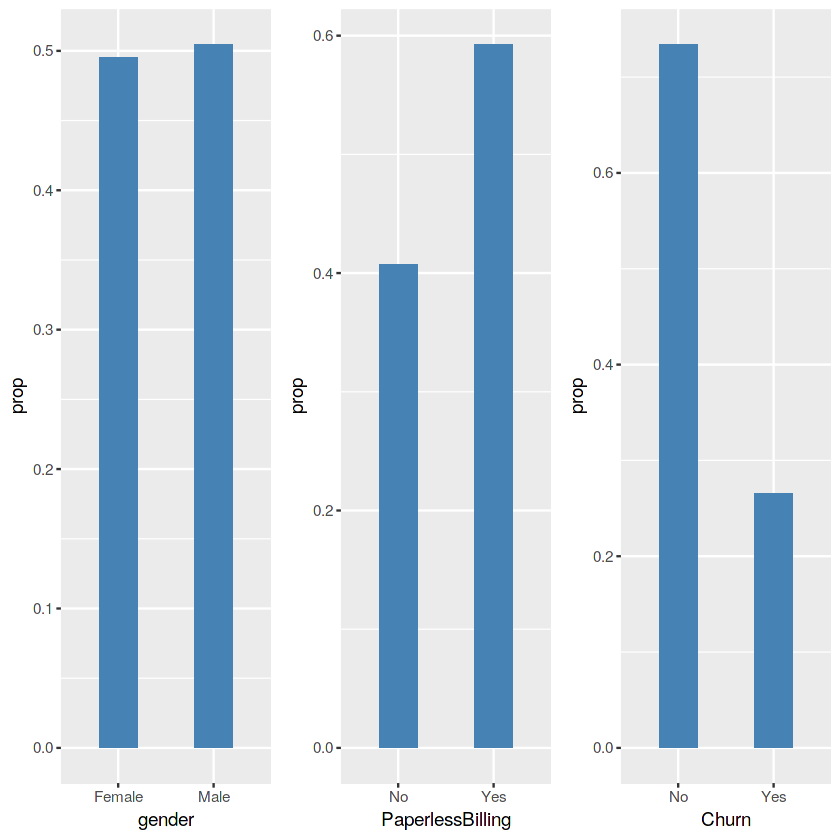

In [13]:
grid.arrange(plot5,plot19,plot20,ncol=3)

1.  The data includes almost equal proportion of males and females.
2.  Almost 58% customers are on paperless billing.
3.  26% of the customers have churned from the platform.

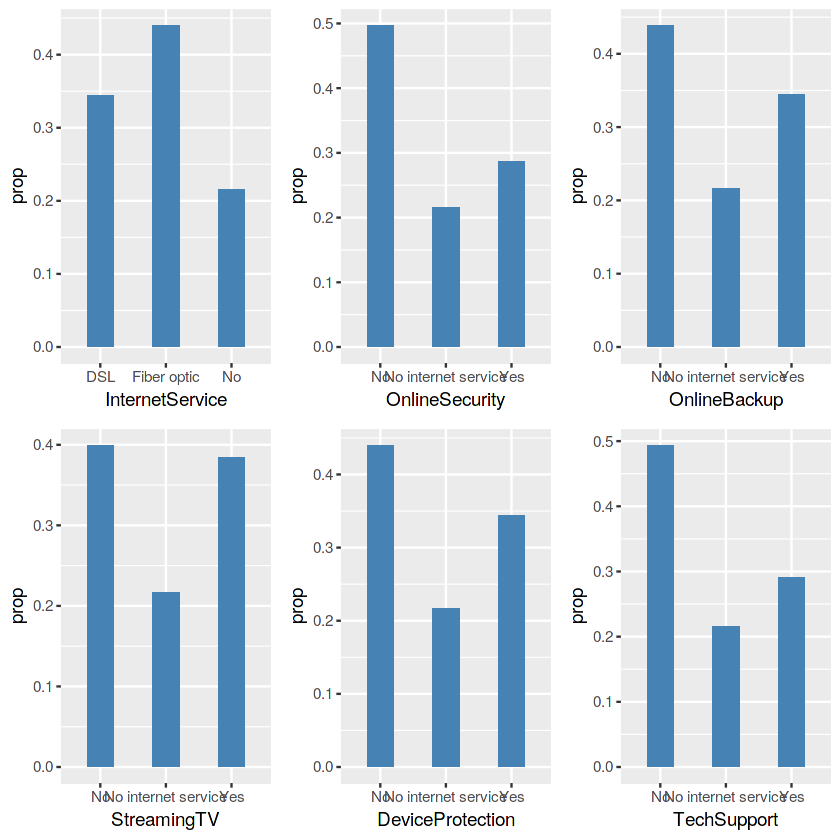

In [14]:
grid.arrange(plot11,plot12,plot13,plot16,plot14,plot15,nrow=2, ncol=3)

1. Almost 40% of the customers have subscribed for the Fibre optic internet service.
2. Almost 50% of the customers have no online security and almost 45% customers have no online backup.
3. Almost 50% customers have no techsupport access and 40% have no streamingtv as a service.
4. 45% of the customers have no service of device protection. 

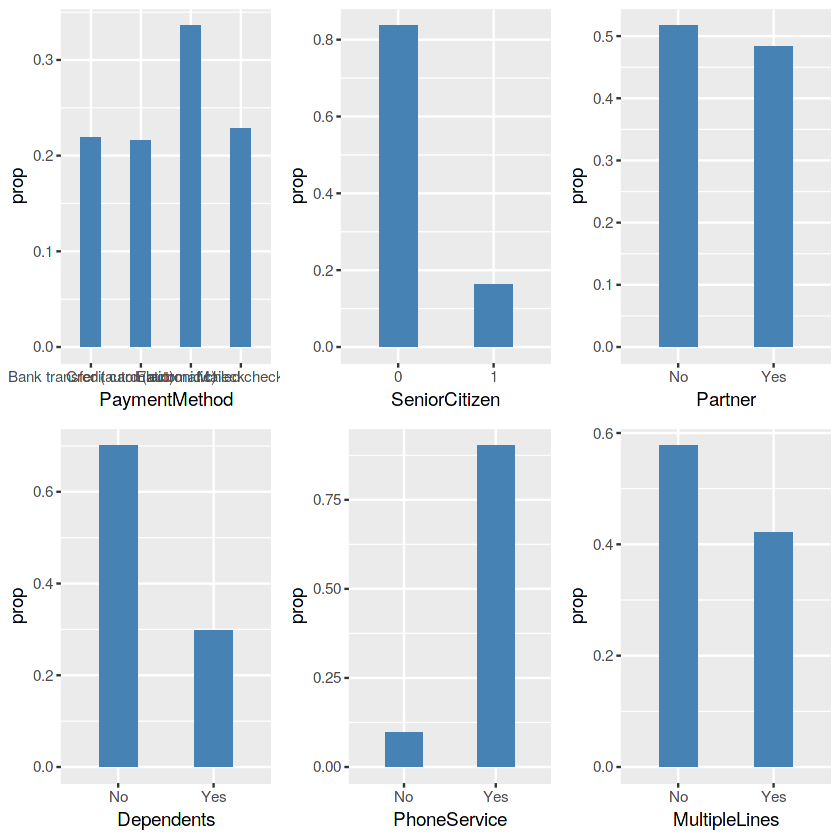

In [15]:
grid.arrange(plot4,plot6,plot7,plot8,plot9,plot10,nrow=2,ncol=3)

1. Maximum number of customers have subscribered for electronic check for their payments.
2. Very less i.e approx 20% of the customers are senior citizens.
3. Equal number of customers with and without partners.
4. 65% of the customers have no dependents.
5. Almost 87% of the customers are with the phoneservice.

In [16]:
#Numerical Summaries of  Variables 
#Gender
cat("Gender")
type_counts1 <- table(my_data$gender)
type_counts1 / sum(type_counts1) * 100

#SeniorCitizen
cat("SeniorCitizen")
type_counts2 <- table(my_data$SeniorCitizen)
type_counts2 / sum(type_counts2) * 100

#Partner
cat("Partner")
type_counts3 <- table(my_data$Partner)
type_counts3 / sum(type_counts3) * 100

#Dependents
cat("SeniorCitizen")
type_counts4 <- table(my_data$Dependents)
type_counts4 / sum(type_counts4) * 100
             
#PhoneService
cat("Dependents")
type_counts5 <- table(my_data$PhoneService)
type_counts5 / sum(type_counts5) * 100

#MultipleLines
cat("MultipleLines")
type_counts6 <- table(my_data$MultipleLines)
type_counts6 / sum(type_counts6) * 100

#InternetService
cat("InternetService")
type_counts7 <- table(my_data$InternetService)
type_counts7 / sum(type_counts7) * 100

#OnlineSecurity
cat("OnlineSecurity")
type_counts8 <- table(my_data$OnlineSecurity)
type_counts8 / sum(type_counts8) * 100
              
#OnlineBackup
cat("OnlineBackup")
type_counts9 <- table(my_data$OnlineBackup)
type_counts9 / sum(type_counts9) * 100

#DeviceProtection
cat("DeviceProtection")
type_counts10 <- table(my_data$DeviceProtection)
type_counts10 / sum(type_counts10) * 100

#TechSupport
cat("TechSupport")
type_counts11 <- table(my_data$TechSupport)
type_counts11 / sum(type_counts11) * 100

#StreamingTV
cat("StreamingTV")
type_counts12 <- table(my_data$StreamingTV)
type_counts12 / sum(type_counts12) * 100

#STreaming Movies
cat("STreaming Movies")
type_counts13 <- table(my_data$StreamingMovies)
type_counts13 / sum(type_counts13) * 100

#Contract
cat("Contract")
type_counts14 <- table(my_data$Contract)
type_counts14 / sum(type_counts14) * 100

#PaperlessBilling
cat("PaperlessBilling")
type_counts15 <- table(my_data$PaperlessBilling)
type_counts15 / sum(type_counts15) * 100

#PaymentMethod
cat("PaymentMethod")
type_counts16 <- table(my_data$PaymentMethod)
type_counts16 / sum(type_counts16) * 100

#Churn
cat("Churn")
type_counts17 <- table(my_data$Churn)
type_counts17 / sum(type_counts17) * 100


Gender


  Female     Male 
49.53072 50.46928 

SeniorCitizen


       0        1 
83.75995 16.24005 

Partner


      No      Yes 
51.74915 48.25085 

SeniorCitizen


      No      Yes 
70.15074 29.84926 

Dependents


      No      Yes 
 9.67008 90.32992 

MultipleLines


              No No phone service              Yes 
        57.80717          0.00000         42.19283 

InternetService


        DSL Fiber optic          No 
   34.35722    44.02730    21.61547 

OnlineSecurity


                 No No internet service                 Yes 
           49.72981            21.61547            28.65472 

OnlineBackup


                 No No internet service                 Yes 
           43.89932            21.61547            34.48521 

DeviceProtection


                 No No internet service                 Yes 
           43.99886            21.61547            34.38567 

TechSupport


                 No No internet service                 Yes 
           49.37429            21.61547            29.01024 

StreamingTV


                 No No internet service                 Yes 
           39.94596            21.61547            38.43857 

STreaming Movies


                 No No internet service                 Yes 
           39.54778            21.61547            38.83675 

Contract


Month-to-month       One year       Two year 
      55.10523       20.93288       23.96189 

PaperlessBilling


     No     Yes 
40.7281 59.2719 

PaymentMethod


Bank transfer (automatic)   Credit card (automatic)          Electronic check 
                 21.92833                  21.62969                  33.63197 
             Mailed check 
                 22.81001 

Churn


     No     Yes 
73.4215 26.5785 

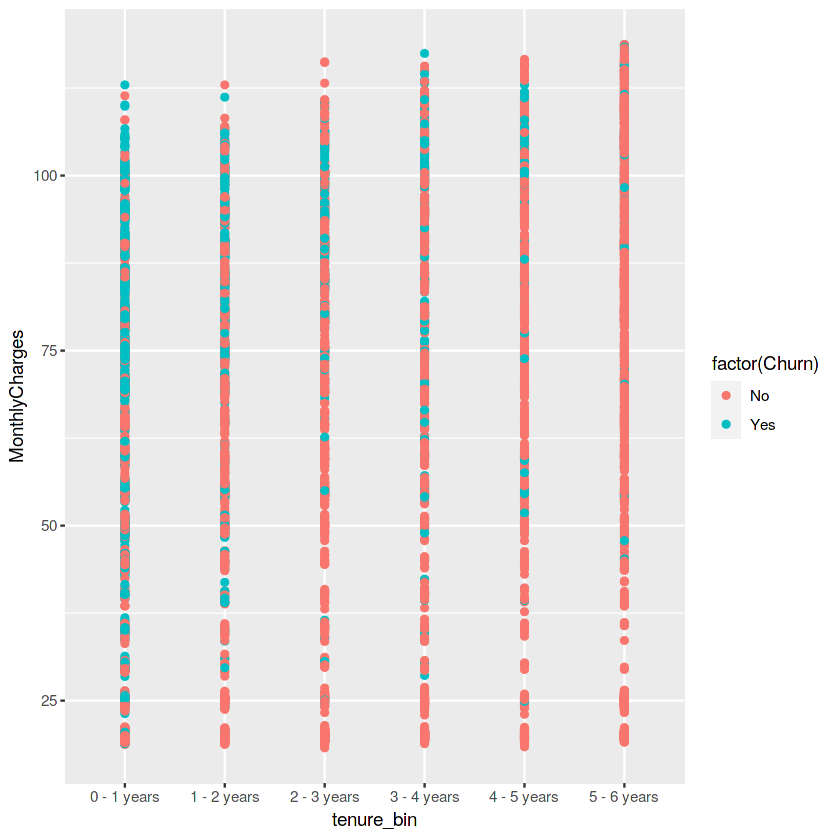

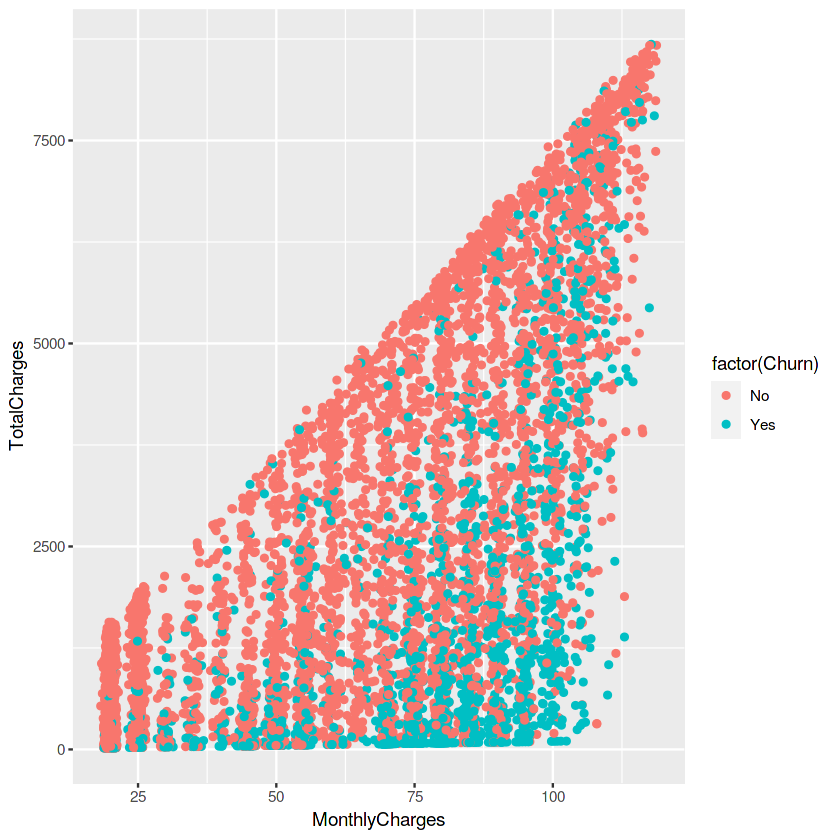

In [17]:
#Dependent variable Churn vs Tenure_bin
ggplot(my_data, aes(x = tenure_bin , y = MonthlyCharges)) + geom_point(aes(colour=factor(Churn)))

#Dependent variable Churn vs 
ggplot(my_data, aes(x = MonthlyCharges , y = TotalCharges)) + geom_point(aes(colour=factor(Churn)))

1. Maximum Customers churned from the platform are the one having a tenure of 0-1 years.
2. Maximum Churned customers have a Monthly charge more than $65. 

In [18]:
#Relationship between the variables (dependent variable Churn vs Categorical Variables) 
#gender vs churn
plot_relation_1 =ggplot(my_data, aes(x = gender,fill=Churn)) + geom_bar(width = 0.4)
#SeniorCitizen vs Churn
plot_relation_2 =ggplot(my_data, aes(x = SeniorCitizen,fill=Churn)) + geom_bar(width = 0.4)
#partner vs Churn
plot_relation_3 =ggplot(my_data, aes(x = Partner,fill=Churn)) + geom_bar(width = 0.4)
#Dependents vs Churn
plot_relation_4 =ggplot(my_data, aes(x = Dependents,fill=Churn)) + geom_bar(width = 0.4)
#phoneservices vs Churn
plot_relation_5 =ggplot(my_data, aes(x = PhoneService,fill=Churn)) + geom_bar(width = 0.4)
#MultipleLines vs Churn
plot_relation_6 =ggplot(my_data, aes(x = MultipleLines,fill=Churn)) + geom_bar(width = 0.4)
#InternetServices vs Churn
plot_relation_7 =ggplot(my_data, aes(x = InternetService,fill=Churn)) + geom_bar(width = 0.4)
#OnlineSecurity vs Churn
plot_relation_8 =ggplot(my_data, aes(x = OnlineSecurity,fill=Churn)) + geom_bar(width = 0.4)
#Onlinebackup vs Churn
plot_relation_9 =ggplot(my_data, aes(x = OnlineBackup,fill=Churn)) + geom_bar(width = 0.4)
#DeviceProtection vs Churn
plot_relation_10 =ggplot(my_data, aes(x = DeviceProtection,fill=Churn)) + geom_bar(width = 0.4)
#TechSupport vs Churn
plot_relation_11 =ggplot(my_data, aes(x = TechSupport,fill=Churn)) + geom_bar(width = 0.4)
#StreamingTV vs Churn
plot_relation_12 =ggplot(my_data, aes(x = StreamingTV,fill=Churn)) + geom_bar(width = 0.4)
#StreamingMovies vs Churn
plot_relation_13 =ggplot(my_data, aes(x = StreamingMovies,fill=Churn)) + geom_bar(width = 0.4)
#Contract vs Churn
plot_relation_14 =ggplot(my_data, aes(x = Contract,fill=Churn)) + geom_bar(width = 0.4)
#PaperlessBilling vs Churn
plot_relation_15 =ggplot(my_data, aes(x = PaperlessBilling,fill=Churn)) + geom_bar(width = 0.4)
#PaymentMethod vs Churn
plot_relation_16 =ggplot(my_data, aes(x = PaymentMethod,fill=Churn)) + geom_bar(width = 0.4)

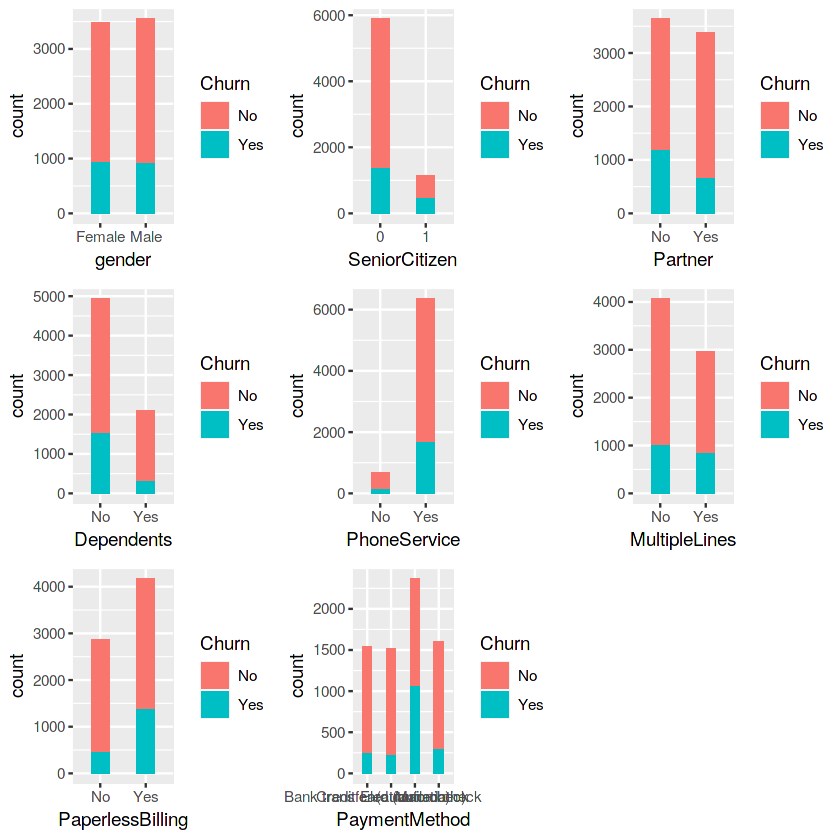

In [19]:
grid.arrange(plot_relation_1,plot_relation_2,plot_relation_3,plot_relation_4,plot_relation_5,plot_relation_6,plot_relation_15,plot_relation_16)

* Churn rate is equally divided among the male and female customers.
* Churn rate is more among the customers with no dependents.
* Churn rate is more with customers having phone service.
* Churn rate is more with customers having paperless billing.
* Churn rate is more with customers having electronic check as the payment mode.

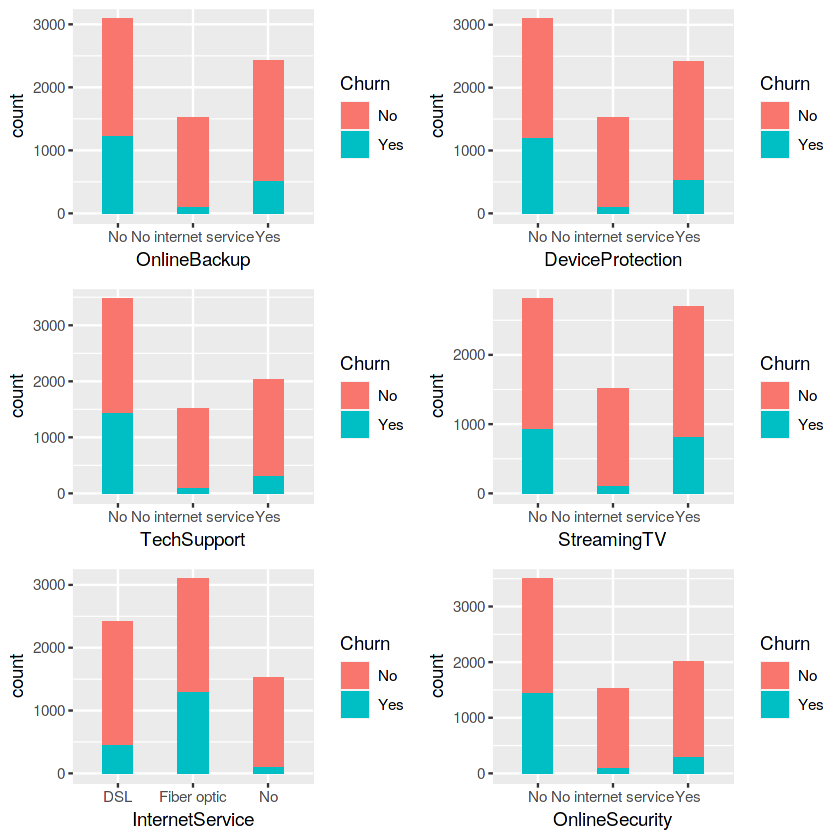

In [20]:
grid.arrange(plot_relation_9,plot_relation_10,plot_relation_11,plot_relation_12,plot_relation_7,plot_relation_8)

* Churn rate is more with customers having month to month contract.
* Churn rate is more with customers having no online security and techsupport.
* Churn rate is almost equal among the subscribers with or without the streamingtv.

In [21]:
names(my_data)

[1] "customerID"       "gender"           "SeniorCitizen"    "Partner"         
 [5] "Dependents"       "tenure"           "PhoneService"     "MultipleLines"   
 [9] "InternetService"  "OnlineSecurity"   "OnlineBackup"     "DeviceProtection"
[13] "TechSupport"      "StreamingTV"      "StreamingMovies"  "Contract"        
[17] "PaperlessBilling" "PaymentMethod"    "MonthlyCharges"   "TotalCharges"    
[21] "Churn"            "tenure_bin"

In [22]:
#creating dummy variables 
my_data_cat <- my_data[,-c(1,3,6,19,20)]
dummy<- data.frame(sapply(my_data_cat,function(x) data.frame(model.matrix(~x-1,data = my_data))[,-1]))

In [23]:
my_new_data_set <- cbind(my_data[,c(1,3,6,19,20)],dummy)

In [24]:
#now that we dont need the customerID ll be removing it off from the dataset.
my_new_data_set$customerID <- NULL
#removing the tenure from the dataset as we have already transformed the tenure values in tenure_bin.
my_new_data_set$tenure <- NULL

In [25]:
#data splliting into test and train into 80 20 ratio.


num = sample(2,nrow(my_new_data_set),replace = T,prob = c(0.7,0.3))

train_data <-  my_new_data_set[num==1,]
test_data  <-  my_new_data_set[num==2,]


In [26]:
str(my_new_data_set)

#my_new_data_set$SeniorCitizen = as.numeric(my_new_data_set$SeniorCitizen)

'data.frame':	7032 obs. of  35 variables:
 $ SeniorCitizen                         : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ MonthlyCharges                        : num  29.9 57 53.9 42.3 70.7 ...
 $ TotalCharges                          : num  29.9 1889.5 108.2 1840.8 151.7 ...
 $ gender                                : num  0 1 1 1 0 0 1 0 0 1 ...
 $ Partner                               : num  1 0 0 0 0 0 0 0 1 0 ...
 $ Dependents                            : num  0 0 0 0 0 0 1 0 0 1 ...
 $ PhoneService                          : num  0 1 1 0 1 1 1 0 1 1 ...
 $ MultipleLines.xNo.phone.service       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ MultipleLines.xYes                    : num  0 0 0 0 0 1 1 0 1 0 ...
 $ InternetService.xFiber.optic          : num  0 0 0 0 1 1 1 0 1 0 ...
 $ InternetService.xNo                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OnlineSecurity.xNo.internet.service   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ OnlineSecurity.xYes                   : num  0 1 1 1 0

MODEL PROCESSING

****1 . LOGISTIC REGRESSION****

In [27]:
log_model <- glm(Churn ~ .,family ="binomial", data=train_data)

In [28]:
summary(log_model)


Call:
glm(formula = Churn ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0790  -0.6604  -0.2975   0.6457   3.0386  

Coefficients: (7 not defined because of singularities)
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                             8.303e-01  9.733e-01   0.853 0.393660
SeniorCitizen1                          3.017e-01  1.022e-01   2.951 0.003165
MonthlyCharges                         -4.163e-02  3.826e-02  -1.088 0.276599
TotalCharges                           -1.282e-04  7.214e-05  -1.777 0.075648
gender                                 -3.022e-02  7.814e-02  -0.387 0.698921
Partner                                -4.163e-02  9.310e-02  -0.447 0.654774
Dependents                             -1.305e-01  1.086e-01  -1.202 0.229557
PhoneService                            3.275e-01  7.807e-01   0.419 0.674859
MultipleLines.xNo.phone.service                NA       

In [29]:
#stepAIC
step_2 <- stepAIC(log_model,direction = "both")
step_2$anova

Start:  AIC=4113.91
Churn ~ SeniorCitizen + MonthlyCharges + TotalCharges + gender + 
    Partner + Dependents + PhoneService + MultipleLines.xNo.phone.service + 
    MultipleLines.xYes + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity.xNo.internet.service + OnlineSecurity.xYes + 
    OnlineBackup.xNo.internet.service + OnlineBackup.xYes + DeviceProtection.xNo.internet.service + 
    DeviceProtection.xYes + TechSupport.xNo.internet.service + 
    TechSupport.xYes + StreamingTV.xNo.internet.service + StreamingTV.xYes + 
    StreamingMovies.xNo.internet.service + StreamingMovies.xYes + 
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xCredit.card..automatic. + PaymentMethod.xElectronic.check + 
    PaymentMethod.xMailed.check + tenure_bin.x1...2.years + tenure_bin.x2...3.years + 
    tenure_bin.x3...4.years + tenure_bin.x4...5.years + tenure_bin.x5...6.years


Step:  AIC=4113.91
Churn ~ SeniorCitizen + MonthlyCharges + TotalCha

                                         Df Deviance    AIC
- PaymentMethod.xMailed.check             1   4058.0 4110.0
- PaymentMethod.xCredit.card..automatic.  1   4058.0 4110.0
- gender                                  1   4058.1 4110.1
- Partner                                 1   4058.1 4110.1
- PhoneService                            1   4058.4 4110.4
- TechSupport.xYes                        1   4058.5 4110.5
- OnlineSecurity.xYes                     1   4058.7 4110.7
- Dependents                              1   4059.4 4111.4
<none>                                        4057.9 4111.9
- DeviceProtection.xYes                   1   4060.6 4112.6
- TotalCharges                            1   4061.0 4113.0
+ OnlineBackup.xYes                       1   4057.9 4113.9
- MonthlyCharges                          1   4063.1 4115.1
- PaperlessBilling                        1   4064.1 4116.1
- tenure_bin.x5...6.years                 1   4066.2 4118.2
- SeniorCitizen                         


Step:  AIC=4104.39
Churn ~ SeniorCitizen + MonthlyCharges + TotalCharges + Dependents + 
    PhoneService + MultipleLines.xYes + InternetService.xFiber.optic + 
    InternetService.xNo + OnlineSecurity.xYes + DeviceProtection.xYes + 
    TechSupport.xYes + StreamingTV.xYes + StreamingMovies.xYes + 
    Contract.xOne.year + Contract.xTwo.year + PaperlessBilling + 
    PaymentMethod.xElectronic.check + tenure_bin.x1...2.years + 
    tenure_bin.x2...3.years + tenure_bin.x3...4.years + tenure_bin.x4...5.years + 
    tenure_bin.x5...6.years

                                         Df Deviance    AIC
- PhoneService                            1   4058.9 4102.9
- TechSupport.xYes                        1   4059.0 4103.0
- OnlineSecurity.xYes                     1   4059.2 4103.2
<none>                                        4058.4 4104.4
- Dependents                              1   4060.8 4104.8
- DeviceProtection.xYes                   1   4061.1 4105.1
- TotalCharges                      

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,4841,4057.910,4113.910
- StreamingMovies.xNo.internet.service,0,0.000000000,4841,4057.910,4113.910
- StreamingTV.xNo.internet.service,0,0.000000000,4841,4057.910,4113.910
- TechSupport.xNo.internet.service,0,0.000000000,4841,4057.910,4113.910
- DeviceProtection.xNo.internet.service,0,0.000000000,4841,4057.910,4113.910
- OnlineBackup.xNo.internet.service,0,0.000000000,4841,4057.910,4113.910
- OnlineSecurity.xNo.internet.service,0,0.000000000,4841,4057.910,4113.910
- MultipleLines.xNo.phone.service,0,0.000000000,4841,4057.910,4113.910
- OnlineBackup.xYes,1,0.007378713,4842,4057.918,4111.918


In [30]:
log_model <- glm(Churn ~ SeniorCitizen + TotalCharges + PhoneService + MultipleLines.xYes + 
    InternetService.xFiber.optic + InternetService.xNo + OnlineSecurity.xYes + 
    OnlineBackup.xYes + TechSupport.xYes + StreamingTV.xYes + 
    StreamingMovies.xYes + Contract.xOne.year + Contract.xTwo.year + 
    PaperlessBilling + PaymentMethod.xElectronic.check + tenure_bin.x1...2.years + 
    tenure_bin.x2...3.years + tenure_bin.x3...4.years + tenure_bin.x4...5.years + 
    tenure_bin.x5...6.years,family ="binomial", data=train_data)

In [31]:
summary(log_model)


Call:
glm(formula = Churn ~ SeniorCitizen + TotalCharges + PhoneService + 
    MultipleLines.xYes + InternetService.xFiber.optic + InternetService.xNo + 
    OnlineSecurity.xYes + OnlineBackup.xYes + TechSupport.xYes + 
    StreamingTV.xYes + StreamingMovies.xYes + Contract.xOne.year + 
    Contract.xTwo.year + PaperlessBilling + PaymentMethod.xElectronic.check + 
    tenure_bin.x1...2.years + tenure_bin.x2...3.years + tenure_bin.x3...4.years + 
    tenure_bin.x4...5.years + tenure_bin.x5...6.years, family = "binomial", 
    data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0817  -0.6552  -0.2976   0.6475   3.0417  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -2.889e-01  1.548e-01  -1.867 0.061968 .  
SeniorCitizen1                   3.198e-01  1.003e-01   3.187 0.001438 ** 
TotalCharges                    -1.293e-04  7.057e-05  -1.832 0.066922 .  
PhoneService        

In [32]:
predict_log_model <- predict(log_model,newdata=test_data) 

In [33]:
y_pred_num <- ifelse(predict_log_model > 0.5, 1, 0)

In [34]:
y_predicted <- factor(y_pred_num, levels=c(0, 1))

In [35]:
y_observed <- test_data$Churn

Setting levels: control = 0, case = 1

Setting direction: controls < cases



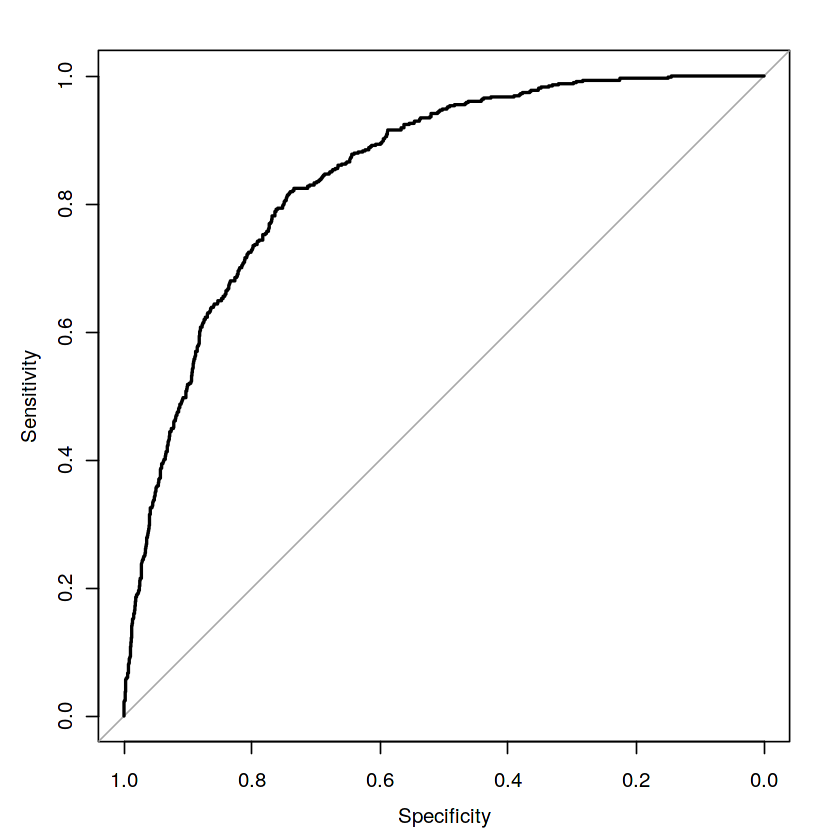

In [36]:
#Evaluate prediction model by calculating accuracy (proportion of y_predicted that match y_observed)

Accuracy_LM <- mean(y_observed == y_predicted)
roc_lm <- roc(test_data$Churn,predict_log_model,plot=TRUE)

With the above Logistic regression kmodel we could see an accuracy of 78% in the model.

In [37]:
table(test_data$Churn)


   0    1 
1582  581 

In [38]:
LM_confusionMatrix <- confusionMatrix(y_predicted,as.factor(y_observed))

In [39]:
LM_confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1503  375
         1   79  206
                                          
               Accuracy : 0.7901          
                 95% CI : (0.7723, 0.8071)
    No Information Rate : 0.7314          
    P-Value [Acc > NIR] : 1.561e-10       
                                          
                  Kappa : 0.3632          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9501          
            Specificity : 0.3546          
         Pos Pred Value : 0.8003          
         Neg Pred Value : 0.7228          
             Prevalence : 0.7314          
         Detection Rate : 0.6949          
   Detection Prevalence : 0.8682          
      Balanced Accuracy : 0.6523          
                                          
       'Positive' Class : 0               
                        

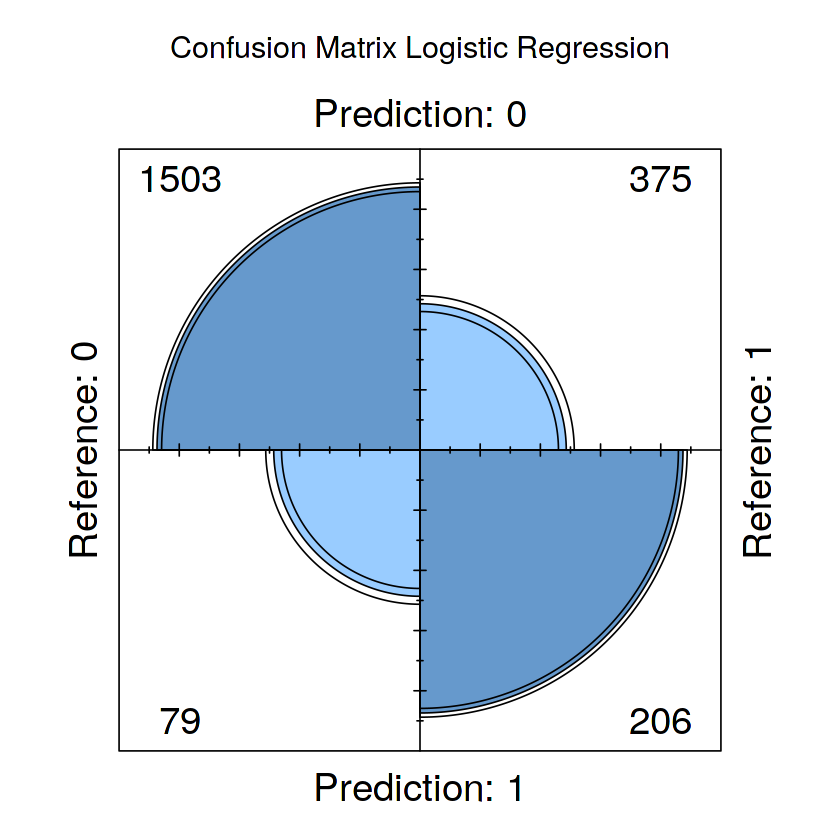

In [40]:
fourfoldplot(LM_confusionMatrix$table,main = "Confusion Matrix Logistic Regression")

****2.DECISION TREE****

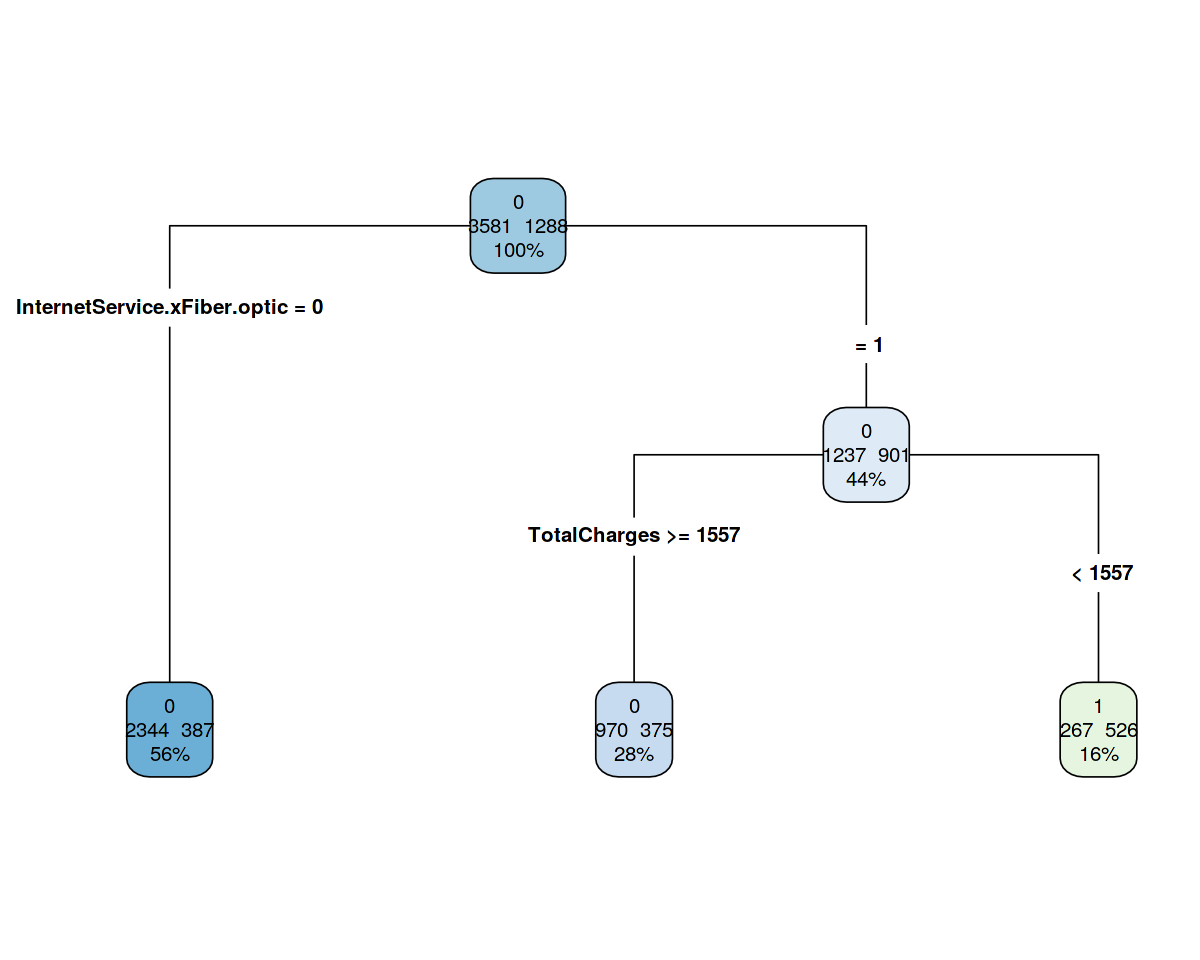

In [41]:
train_data$Churn <- as.factor(train_data$Churn)

test_data$Churn <- as.factor(test_data$Churn)

options(repr.plot.width = 10, repr.plot.height = 8)

decision_model <- rpart(Churn ~ ., data=train_data,method="class")

rpart.plot(decision_model,type = 4,extra=101)


In [42]:
predict_decision_model <- predict(decision_model,newdata=test_data,type='class')

table(predict_decision_model,test_data$Churn)

DT_confusionMatrix <- confusionMatrix(predict_decision_model,as.factor(test_data$Churn))

                      
predict_decision_model    0    1
                     0 1474  340
                     1  108  241

In [43]:
pred <- predict(decision_model,test_data,type = 'prob')

roc_dm <- roc(test_data$Churn,pred[,2])

Accuracy_DT <- mean(y_observed == predict_decision_model)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



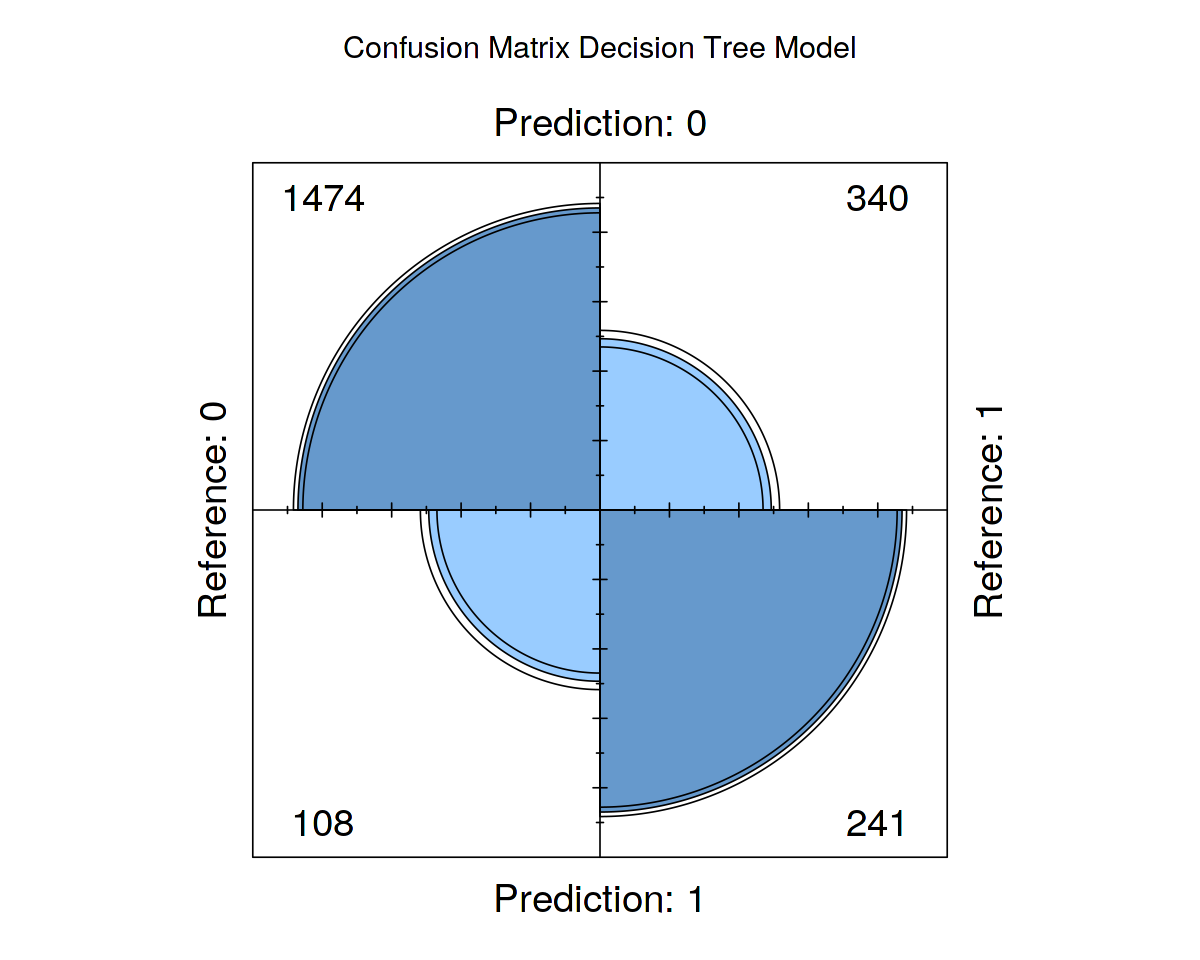

In [44]:
fourfoldplot(DT_confusionMatrix$table,main="Confusion Matrix Decision Tree Model")

In [45]:
DT_confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1474  340
         1  108  241
                                          
               Accuracy : 0.7929          
                 95% CI : (0.7752, 0.8098)
    No Information Rate : 0.7314          
    P-Value [Acc > NIR] : 2.051e-11       
                                          
                  Kappa : 0.3966          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9317          
            Specificity : 0.4148          
         Pos Pred Value : 0.8126          
         Neg Pred Value : 0.6905          
             Prevalence : 0.7314          
         Detection Rate : 0.6815          
   Detection Prevalence : 0.8387          
      Balanced Accuracy : 0.6733          
                                          
       'Positive' Class : 0               
                        

**3. Random Forest Modelling**

In [46]:
forest_model <- randomForest(Churn ~ .,data = train_data,proximity=TRUE)

In [47]:
predict_forest_model <- predict(forest_model,newdata=test_data,type ="prob" )

predict_forest_model_cm<- predict(forest_model,newdata=test_data)

table(predict_forest_model_cm,test_data$Churn)

                       
predict_forest_model_cm    0    1
                      0 1439  288
                      1  143  293

In [48]:
RF_confusionMatrix <- confusionMatrix(predict_forest_model_cm,as.factor(test_data$Churn))

roc_rfm <- roc(test_data$Churn,predict_forest_model[,2])

Accuracy_RF <-  mean(y_observed == predict_forest_model_cm)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



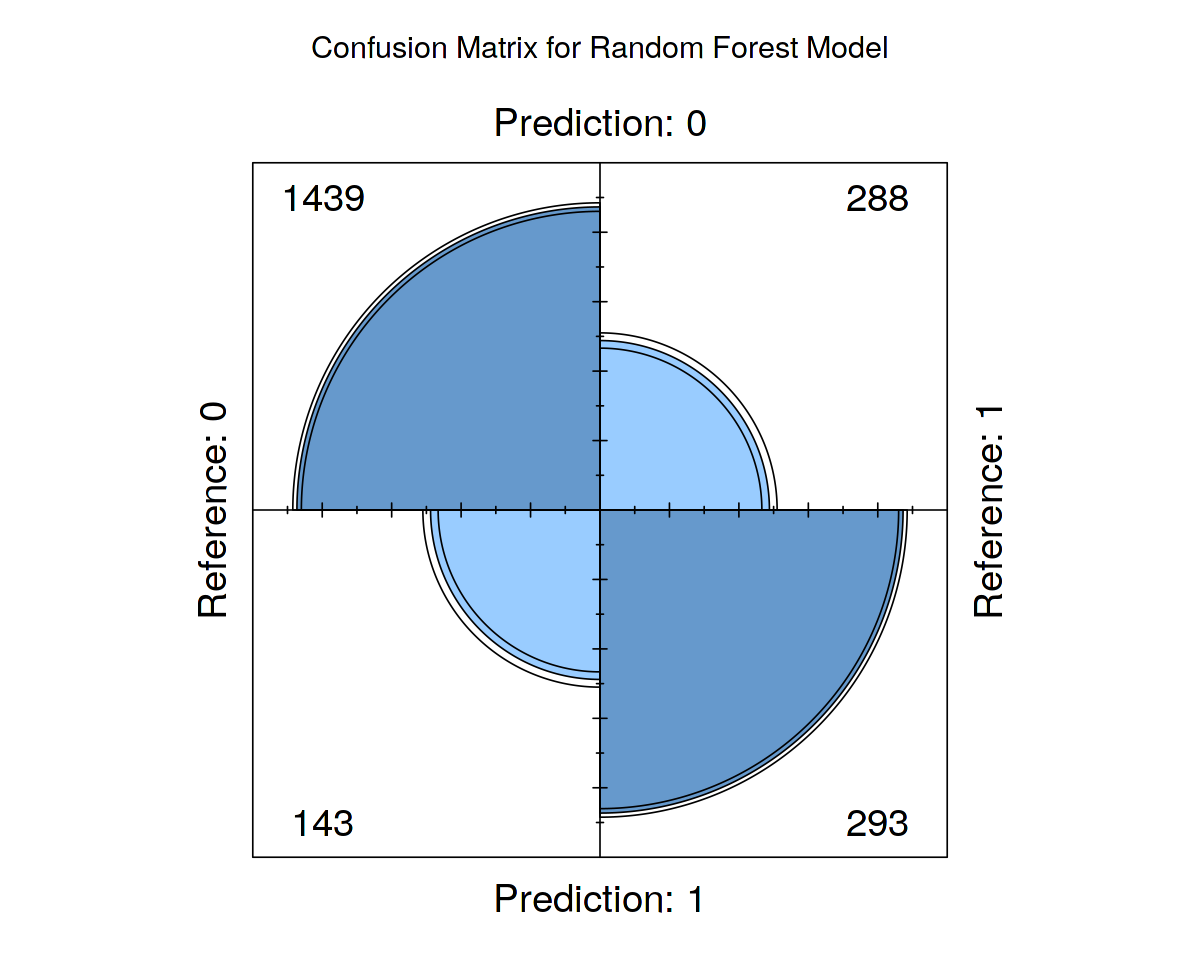

In [49]:
fourfoldplot(RF_confusionMatrix$table,main = "Confusion Matrix for Random Forest Model")

In [50]:
RF_confusionMatrix

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1439  288
         1  143  293
                                          
               Accuracy : 0.8007          
                 95% CI : (0.7833, 0.8174)
    No Information Rate : 0.7314          
    P-Value [Acc > NIR] : 3.789e-14       
                                          
                  Kappa : 0.4494          
                                          
 Mcnemar's Test P-Value : 4.027e-12       
                                          
            Sensitivity : 0.9096          
            Specificity : 0.5043          
         Pos Pred Value : 0.8332          
         Neg Pred Value : 0.6720          
             Prevalence : 0.7314          
         Detection Rate : 0.6653          
   Detection Prevalence : 0.7984          
      Balanced Accuracy : 0.7070          
                                          
       'Positive' Class : 0               
                        

**Accuracy Comparison for the three Models**

In [51]:
cat("Accuracy for Logistic Model" ,Accuracy_LM)
cat("\nAccuracy for Decision Tree Model",Accuracy_DT)
cat("\nAccuracy for Random Forest Model",Accuracy_RF)

Accuracy for Logistic Model 0.7901063
Accuracy for Decision Tree Model 0.7928803
Accuracy for Random Forest Model 0.8007397

****ROC analysis for the three Models****

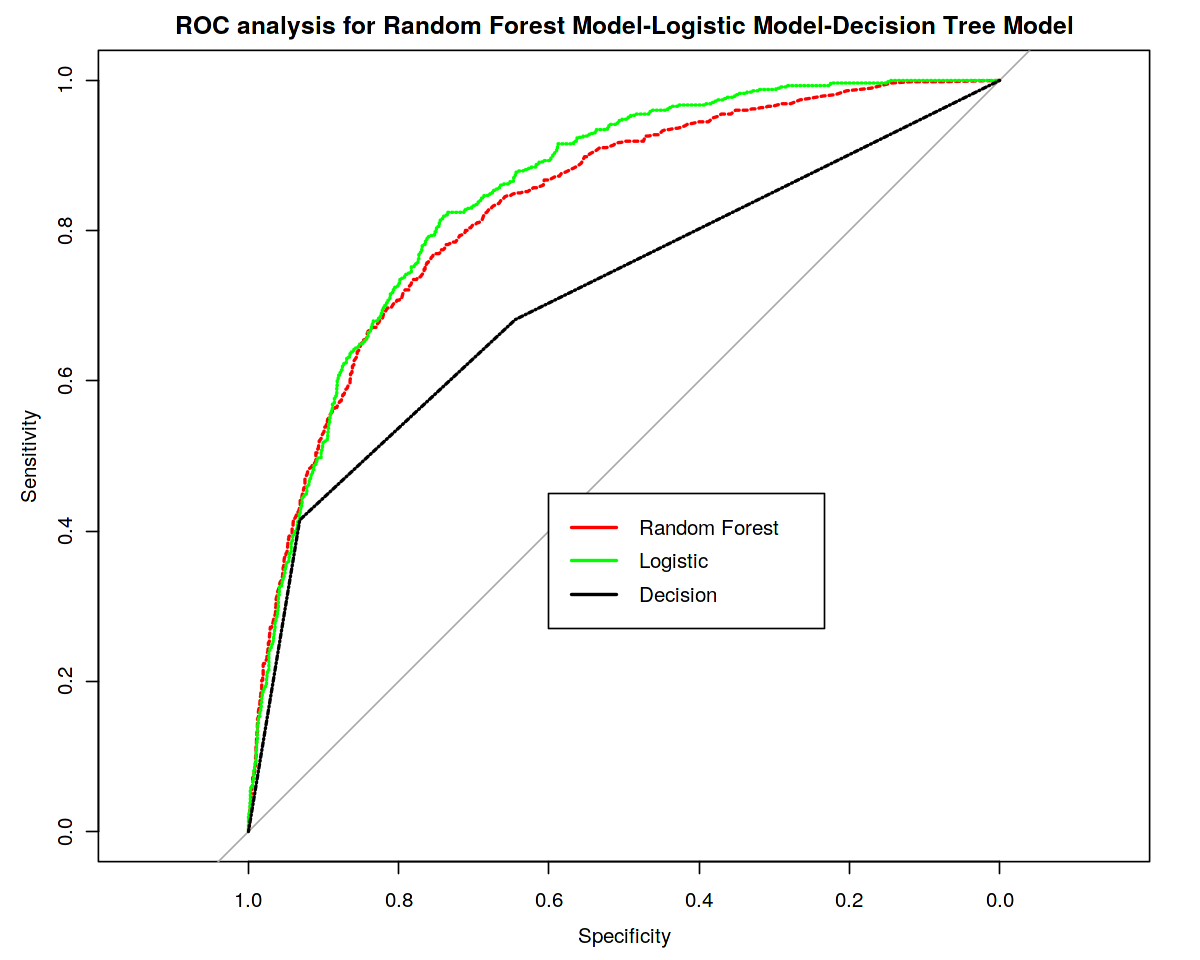

In [52]:
#First curve:
plot(roc_rfm, col = "red", lty = 2, main = "ROC analysis for Random Forest Model-Logistic Model-Decision Tree Model")
# to add to the same graph: add=TRUE
plot(roc_lm, col = "green", lty = 3, add = TRUE)
plot(roc_dm, col = "black", lty = 10, add = TRUE)
legend(0.6,0.45, c('Random Forest','Logistic','Decision'),lty=c(1,1),lwd=c(2,2),col=c('red','green','black'))

****BUSINESS COST ASSUMPTION :****

In [53]:
#If no predictive model is implemented by the company
Total_Cost_No_model <- length(test_data$Churn[test_data$Churn == 1]) * 500

#Logistic regression
LM_acuracy <- data.frame(LM_confusionMatrix$table)
TP_LM <- LM_acuracy$Freq[LM_acuracy$Prediction == 0 & LM_acuracy$Reference == 0]
TN_LM <- LM_acuracy$Freq[LM_acuracy$Prediction == 1 & LM_acuracy$Reference == 1]
FN_LM <- LM_acuracy$Freq[LM_acuracy$Prediction == 0 & LM_acuracy$Reference == 1]
FP_LM <- LM_acuracy$Freq[LM_acuracy$Prediction == 1 & LM_acuracy$Reference == 0]

Total_Cost_LM <- FN_LM * 500 + TN_LM * 100 + FP_LM * 100

#Decision tree
DT_acuracy <- data.frame(DT_confusionMatrix$table)
TP_DT <- DT_acuracy$Freq[DT_acuracy$Prediction == 0 & DT_acuracy$Reference == 0]
TN_DT <- DT_acuracy$Freq[DT_acuracy$Prediction == 1 & DT_acuracy$Reference == 1]
FN_DT <- DT_acuracy$Freq[DT_acuracy$Prediction == 0 & DT_acuracy$Reference == 1]
FP_DT <- DT_acuracy$Freq[DT_acuracy$Prediction == 1 & DT_acuracy$Reference == 0]

Total_Cost_DT <- FN_DT * 500 + TN_DT * 100 + FP_DT * 100


#Random Forest
RF_acuracy <- data.frame(RF_confusionMatrix$table)
TP_RF <- RF_acuracy$Freq[RF_acuracy$Prediction == 0 & RF_acuracy$Reference == 0]
TN_RF <- RF_acuracy$Freq[RF_acuracy$Prediction == 1 & RF_acuracy$Reference == 1]
FN_RF <- RF_acuracy$Freq[RF_acuracy$Prediction == 0 & RF_acuracy$Reference == 1]
FP_RF <- RF_acuracy$Freq[RF_acuracy$Prediction == 1 & RF_acuracy$Reference == 0]

Total_Cost_RF <- FN_RF * 500 + TN_RF * 100 + FP_RF * 100


In [54]:
Total_Cost_No_model

[1] 290500

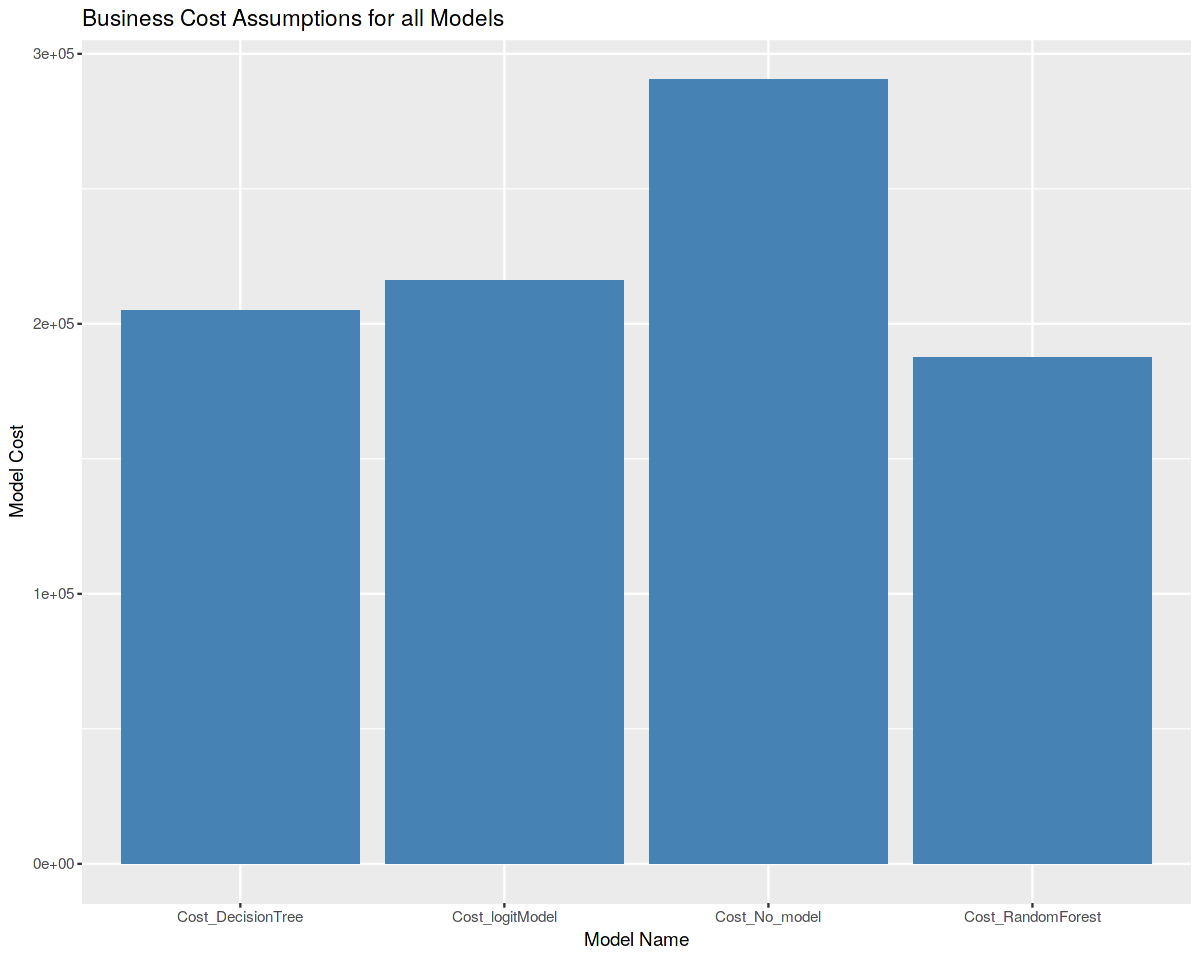

In [55]:
x <- c("Cost_logitModel","Cost_DecisionTree","Cost_RandomForest","Cost_No_model")
y <- c(Total_Cost_LM,Total_Cost_DT,Total_Cost_RF,Total_Cost_No_model)

model_cost <- data.frame("Model" = x,"Cost" = y)


ggplot(model_cost) + 
geom_bar(aes(x=Model,y=Cost),stat ="identity",fill="steelblue") +
#coord_flip()+
xlab("Model Name")+
ylab("Model Cost")+
labs(title = "Business Cost Assumptions for all Models")


**Findings**
* It is definitely for sure if no machine learning model is implemented by the company the company will end up paying more.
* It can also be seen that Random Forest Model would definitely lead to better results and lesser expenditure for the company.